In [1]:
#1.Mengimport beberapa Library
#processing
import pandas as pd #library mengelolah data
import numpy as np #library untuk mengelolah perhitungan matematis
#visualization
import matplotlib.pyplot as plt  #library untuk visualisasi sederhana
import seaborn as sns  #library untuk visualisasi modifikasi

In [2]:
#2.Data Preparation
#import dataset yang dipunya
df = pd.read_csv('HR_comma_sep.csv')

In [3]:
#mengetahui tipe data yang dipunya di dalam sebuah tabel
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
#memanggil kolom tertentu
df[['sales','salary']]

,sales,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
14994,support,low
14995,support,low
14996,support,low
14997,support,low


In [5]:
#menampilkan statistika sederhana dari sebuah data
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
#menampilkan  statistika sederhana lalu mengeluarkan nilai nilai tertentu dan memasukannnya ke dalam parameter
df. describe()['last_evaluation']

,last_evaluation
count,14999.000000
mean,0.716102
std,0.171169
min,0.360000
25%,0.560000
50%,0.720000
75%,0.870000
max,1.000000


In [7]:
#melihat tipe data objek statistika nya
df.select_dtypes('object').describe()

,sales,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


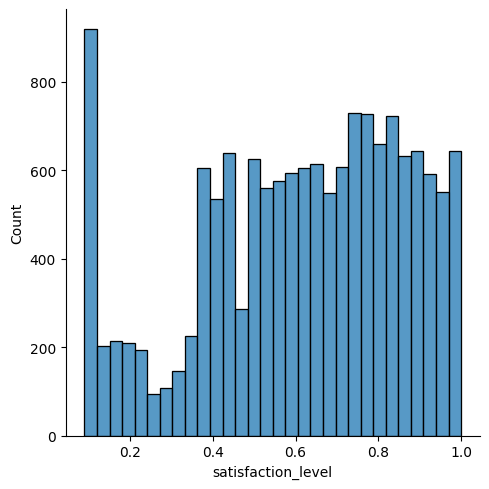

In [8]:
#visualisasi histogram dari kepuasan pelanggan,menggunakan method sns.displot(namatabel['namakolom'])
sns.displot(df['satisfaction_level'])

In [9]:
#melihat sebaran data menggunakan method =>.values_count
df['salary'].value_counts().reset_index()

,salary,count
0,low,7316
1,medium,6446
2,high,1237


<Axes: xlabel='salary', ylabel='count'>

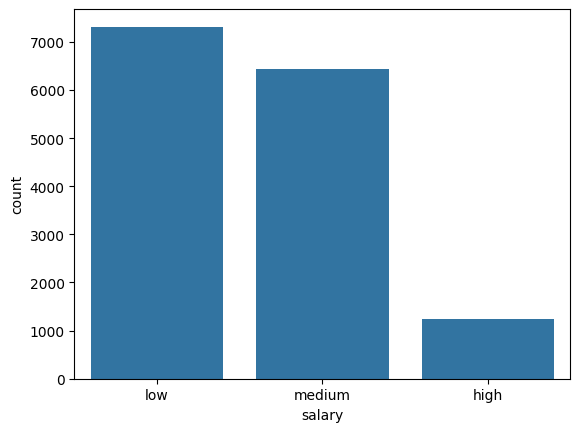

In [10]:
#menyimpan nilai sebaran data yang tadi di lihat,lalu memvisualisasikannya
count_salary = df['salary'].value_counts().reset_index()
# memvisualisasikan menggunakan barplot
sns.barplot(x=count_salary['salary'], y=count_salary['count'])


<Axes: xlabel='count', ylabel='sales'>

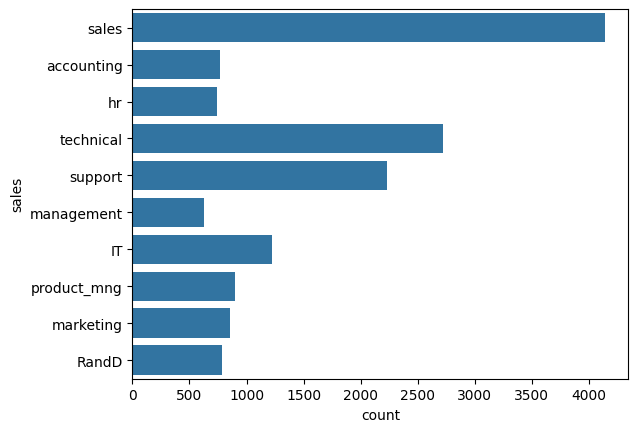

In [11]:
#menggunakan method count plot untuk memvisualisasikan data bar chart,namun biasanya tidak otomatis
sns.countplot(df['sales'])

<Axes: ylabel='satisfaction_level'>

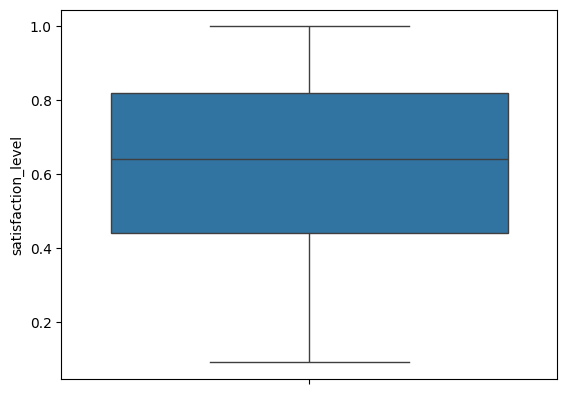

In [12]:
#memvisualisasikan menggunakan boxplot
sns.boxplot(df['satisfaction_level'])

<Axes: xlabel='left', ylabel='satisfaction_level'>

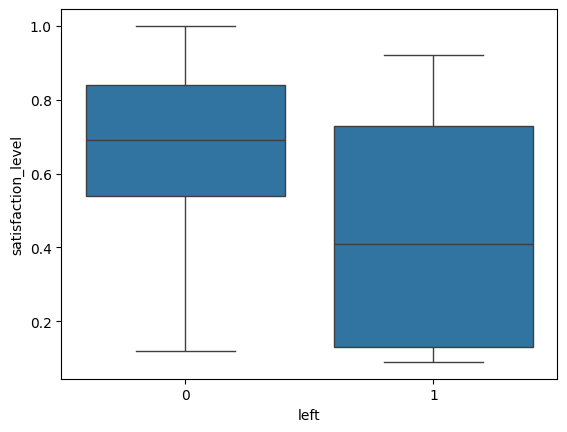

In [13]:
#membandingkan satisfaction level dengan column left(keluar/resign)
sns.boxplot(x=df['left'], y=df['satisfaction_level'])

In [14]:
#Measure of central tendency
#Mencari Mean,Median dan Modus menggunakan method => .mean() , .median(), .mode()
#Untuk mode (modus) kita berikan index karena nilai modus bisa bernilai lebih dari satu

sat_mean = df['satisfaction_level'].mean()
sat_median = df['satisfaction_level'].median()
sat_mode = df['satisfaction_level'].mode()[0]

In [15]:
#mengeluarkan output dari variabel yang telah dibuat,di kolom sebelumnya
print('satisfaction mean=',sat_mean)
print('satisfaction median=',sat_median)
print('satisfaction modus/mode=',sat_mode)

satisfaction mean= 0.6128335222348156
satisfaction median= 0.64
satisfaction modus/mode= 0.1


In [16]:
#Menghitung Quartil (Membagi data menjadi 4 bagian yang sama, yaitu kuartil bawah (Q1), kuartil tengah (Q2), dan kuartil atas (Q3).
q1 = df['satisfaction_level'].quantile(0.25)
q2 = df['satisfaction_level'].quantile(0.5)
q3 = df['satisfaction_level'].quantile(0.75)
#Menghitung Persentil (Membagi data menjadi 100 bagian yang sama, sehingga menghasilkan 99 pembagi berturut-turut yang dinamakan persentil pertama, persentil kedua, hingga persentil ke-99)
p99 = df['satisfaction_level'].quantile(0.99)

In [17]:
q1,q2,q3,p99

(0.44, 0.64, 0.82, 0.99)

In [18]:
#Measure of spread
#Mencari Variansi dan standar deviasi menggunakan method => .var(), .std()

#Variansi mengukur seberapa jauh setiap data dalam dataset dari rata-rata dataset tersebut. Variansi dihitung dengan langkah-langkah berikut:
#1.Menghitung rata-rata (mean) dari dataset.
#2.Menghitung selisih setiap data dari rata-rata.
#3.Menguadratkan setiap selisih tersebut.
#4.Menghitung rata-rata dari nilai kuadrat selisih tersebut.
#Standar deviasi adalah akar kuadrat dari variansi. Standar deviasi memberikan ukuran seberapa tersebar data dalam unit yang sama dengan data itu sendiri, membuatnya lebih mudah untuk diinterpretasikan dibandingkan variansi.

#Mencari standar deviasi juga bisa dihitung dengan method=> sat_sd_sqrt()(akar dari variansi)
sat_var = df['satisfaction_level'].var()#Ini menghitung variansi dari kolom 'satisfaction_level' dalam DataFrame df.Lalu .var() adalah method Pandas yang menghitung variansi sampel dari data dalam kolom yang diberikan.
sat_sd = df['satisfaction_level'].std()#Ini menghitung standar deviasi dari kolom 'satisfaction_level' dalam DataFrame df. Lalu .std() adalah method Pandas yang menghitung standar deviasi sampel dari data dalam kolom yang diberikan.
sat_sd_sqrt = np.sqrt(df['satisfaction_level'].var())#Ini menghitung standar deviasi dengan cara manual.Pertama, variansi dihitung dengan .var(), kemudian akarnya diambil menggunakan np.sqrt() dari NumPy.

In [19]:
print('Variance =',sat_var) #
print('Standard Deviation =',sat_sd)
print('Standard Deviation (Variance Square Root)=',sat_sd_sqrt)

Variance = 0.061817200647087255
Standard Deviation = 0.2486306510611418
Standard Deviation (Variance Square Root)= 0.2486306510611418


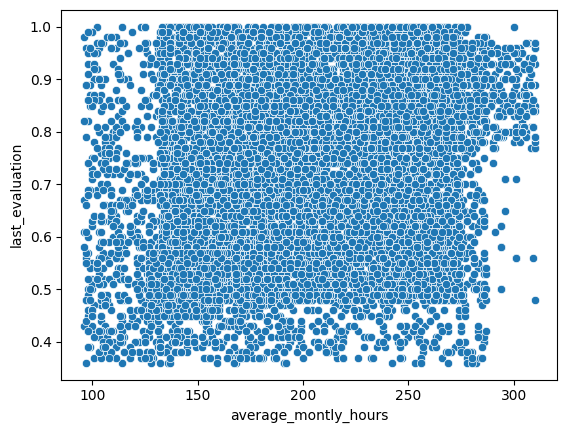

In [20]:
#Menghitung Bivariate (Bivariansi,yang artinya adalah dua variansi)
#Berikut Kode yang menunjukkan hubungan average monthly hour dengan last evaluation
sns.scatterplot(x=df['average_montly_hours'], y=df['last_evaluation'])
plt.show()
#Scatter plot digunakan untuk beberapa alasan utama:

#Visualisasi Hubungan:
#Scatter plot adalah alat yang sangat baik untuk memvisualisasikan hubungan antara dua variabel kontinu. Dalam contoh ini, scatter plot menunjukkan hubungan antara average_montly_hours dan last_evaluation.
#Identifikasi Pola:
#Scatter plot membantu dalam mengidentifikasi pola, tren, dan korelasi potensial antara dua variabel. Misalnya, apakah karyawan yang bekerja lebih banyak jam bulanan cenderung mendapatkan evaluasi yang lebih baik atau sebaliknya.
#Deteksi Outliers:
#Scatter plot juga efektif untuk mendeteksi outliers atau nilai-nilai yang tidak biasa dalam data. Outliers bisa sangat penting untuk dianalisis lebih lanjut karena mereka dapat menunjukkan masalah atau insight yang tidak biasa.
#Distribusi Data:
#Scatter plot memberikan gambaran tentang distribusi data dalam dua dimensi, memungkinkan kita untuk melihat apakah data tersebar merata, terkumpul di satu area, atau memiliki bentuk distribusi tertentu.

#Dalam visualisasi ini, setiap titik di plot mewakili satu entri (misalnya, satu karyawan) dalam dataset,
#dengan posisi horizontal (sumbu x) menunjukkan jumlah rata-rata jam kerja bulanan dan posisi vertikal
#(sumbu y) menunjukkan hasil evaluasi terakhir. Dengan demikian, scatter plot ini memberikan cara yang efektif
#untuk memahami bagaimana kedua variabel tersebut berinteraksi.

In [21]:
#Mencari Korelasi,menggunakan method => .corr()
# Select only the numerical columns before calculating the correlation.

numerical_df = df.select_dtypes(include=['number']) #df adalah DataFrame dari mana kita ingin memilih kolom-kolom tertentu.select_dtypes adalah method Pandas yang digunakan untuk memilih kolom berdasarkan tipe data.
#include=['number'] berarti kita hanya akan memilih kolom-kolom yang memiliki tipe data numerik (misalnya int, float).
#Mengapa memilih kolom numerik?
#Korelasi umumnya dihitung antara variabel numerik. Variabel kategorikal atau tipe data lainnya tidak cocok untuk perhitungan korelasi karena mereka tidak memiliki nilai numerik yang dapat dihubungkan secara langsung.

correlation_matrix = numerical_df.corr()#numerical_df adalah DataFrame yang hanya berisi kolom-kolom numerik yang telah dipilih sebelumnya.
#.corr() adalah method Pandas yang menghitung koefisien korelasi Pearson antara kolom-kolom dalam DataFrame.
#Apa itu Matriks Korelasi?

#Matriks korelasi adalah tabel yang menunjukkan koefisien korelasi antara berbagai pasangan variabel.
#Koefisien korelasi Pearson (nilai antara -1 dan 1) mengukur kekuatan dan arah hubungan linier antara dua variabel.
#Nilai 1 menunjukkan korelasi positif sempurna (ketika satu variabel naik, variabel lain juga naik).
#Nilai -1 menunjukkan korelasi negatif sempurna (ketika satu variabel naik, variabel lain turun).
#Nilai 0 menunjukkan tidak ada korelasi linear antara variabel-variabel tersebut.

correlation_matrix #Dengan hanya menuliskan correlation_matrix, nilai dari matriks korelasi akan ditampilkan dalam output
 #(misalnya dalam Jupyter Notebook atau lingkungan lain yang menampilkan hasil evaluasi ekspresi).

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


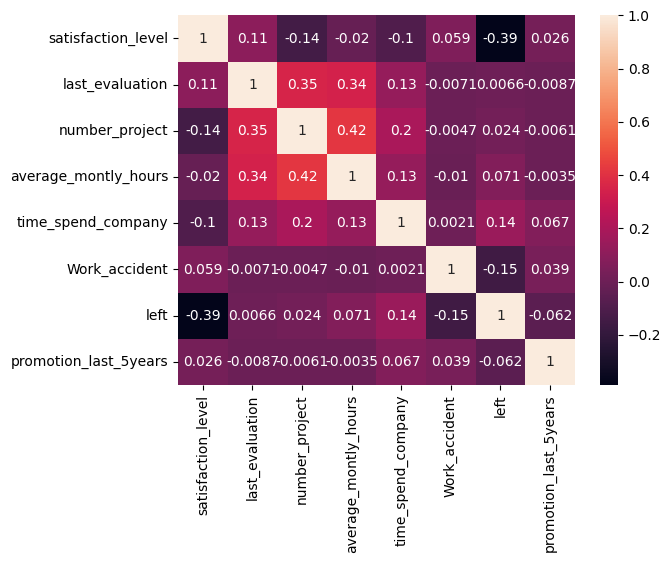

In [22]:
#Untuk mempermudah mengartikan hubungan korelasi maka dapat divisualisasikan dengan heat map
sns.heatmap(numerical_df.corr(),annot=True)
plt.show()
#sns.heatmap(...):
#sns adalah alias umum untuk library seaborn, yang sering digunakan untuk membuat visualisasi statistik yang menarik dan informatif.
#heatmap adalah fungsi dari seaborn yang digunakan untuk membuat peta panas (heatmap).
#numerical_df.corr():

#numerical_df adalah DataFrame yang hanya berisi kolom-kolom numerik yang telah dipilih sebelumnya.
#.corr() adalah method Pandas yang menghitung koefisien korelasi Pearson antara kolom-kolom dalam DataFrame.
#Hasil dari numerical_df.corr() adalah matriks korelasi yang digunakan sebagai input untuk sns.heatmap().
#annot=True:

#Argumen annot=True digunakan untuk menambahkan anotasi pada setiap sel di heatmap.
#Dengan annot=True, nilai numerik dari korelasi akan ditampilkan di dalam setiap sel di heatmap, sehingga lebih mudah untuk membaca nilai korelasi langsung dari heatmap.

#Interpretasi Heatmap
#Warna:

#Warna di heatmap menunjukkan kekuatan dan arah hubungan korelasi.
#Warna yang lebih gelap atau lebih terang dapat menunjukkan korelasi yang lebih kuat atau lebih lemah.
#Warna dengan nilai positif menunjukkan korelasi positif, sedangkan warna dengan nilai negatif menunjukkan korelasi negatif.
#Anotasi:

#Dengan annot=True, setiap sel di heatmap akan berisi nilai korelasi aktual, membuatnya mudah untuk melihat dan membandingkan nilai korelasi antara berbagai pasangan variabel.
#Manfaat Heatmap Korelasi
#Visualisasi Hubungan:
#Heatmap korelasi memungkinkan visualisasi cepat dari hubungan antara semua pasangan variabel numerik dalam dataset.
#Identifikasi Pola:
#Membantu dalam mengidentifikasi pola dan hubungan yang mungkin tidak terlihat dari tabel data mentah.
#Deteksi Multikolinearitas:
#Berguna untuk mendeteksi multikolinearitas dalam analisis regresi, di mana variabel independen yang sangat berkorelasi dapat mempengaruhi hasil model.
#Pemilihan Fitur:
#Membantu dalam pemilihan fitur untuk model machine learning dengan memilih fitur-fitur yang tidak terlalu berkorelasi satu sama lain, sehingga mengurangi redundansi.
#Dengan menggunakan heatmap, kita bisa mendapatkan gambaran visual yang jelas tentang bagaimana setiap variabel numerik dalam dataset berhubungan satu sama lain.

#Pembacaan heatmap dibawah
#1.korelasi tinggi terhadap resign atau tidak (left)
#2.kita lihat dari variabel left ke kanan atau left ke atas,sama saja
#3.Berarti,yang paling kuat korelasinya adalah yang paling menjauhi angka 0,dalam contoh variabel left di atas
#maka korelasi paling kuat dimiliki oleh variabel satisfaction level(nilai negatif),berarti jika semakin
#tidak puas,maka semakin cenderung keinginan untuk meninggalkan perusahaan

In [24]:
'''Hasil
#Dari heatmap di atas dapat disimpulkan bahwa:

1.satisfaction_level:
Negatif kuat dengan left (-0.39), menunjukkan bahwa semakin rendah kepuasan karyawan, semakin besar kemungkinan mereka untuk meninggalkan perusahaan.

2.last_evaluation:
Korelasi positif sedang dengan number_project (0.35) dan average_monthly_hours (0.34), menunjukkan bahwa evaluasi kinerja yang lebih tinggi cenderung terkait dengan lebih banyak proyek dan jam kerja bulanan yang lebih tinggi.

3.number_project:
Korelasi positif sedang dengan average_monthly_hours (0.42), menunjukkan bahwa lebih banyak proyek cenderung terkait dengan lebih banyak jam kerja bulanan.
Korelasi positif kecil dengan time_spend_company (0.2), menunjukkan bahwa karyawan yang telah bekerja lebih lama cenderung memiliki lebih banyak proyek.

4.average_monthly_hours:
Korelasi positif sedang dengan number_project (0.42) dan last_evaluation (0.34), menunjukkan hubungan yang sama seperti yang dijelaskan sebelumnya.

5.time_spend_company:
Korelasi kecil dengan number_project (0.2) dan average_monthly_hours (0.13), menunjukkan hubungan yang lebih lemah antara lamanya bekerja dengan proyek dan jam kerja bulanan.

6.Work_accident:
Korelasi negatif kecil dengan left (-0.15), menunjukkan bahwa karyawan yang mengalami kecelakaan kerja sedikit lebih kecil kemungkinannya untuk meninggalkan perusahaan.

7.left:
Korelasi negatif kuat dengan satisfaction_level (-0.39), menunjukkan bahwa karyawan yang tidak puas lebih mungkin meninggalkan perusahaan.
Korelasi kecil dengan time_spend_company (0.14) dan average_monthly_hours (0.071), menunjukkan bahwa ada sedikit hubungan antara lamanya bekerja dan jumlah jam kerja bulanan dengan keputusan untuk meninggalkan perusahaan.

8.promotion_last_5years:
Korelasi kecil atau sangat kecil dengan variabel lain, menunjukkan bahwa promosi dalam lima tahun terakhir tidak memiliki hubungan linear yang signifikan dengan variabel lainnya.
Secara keseluruhan, heatmap ini membantu mengidentifikasi hubungan antara berbagai faktor yang dapat mempengaruhi retensi karyawan dan kinerja mereka dalam perusahaan. Korelasi yang lebih tinggi (positif atau negatif) menunjukkan hubungan yang lebih kuat antara variabel-variabel tersebut.
'''

'Hasil\n#Dari heatmap di atas dapat disimpulkan bahwa:\n\n1.satisfaction_level:\nNegatif kuat dengan left (-0.39), menunjukkan bahwa semakin rendah kepuasan karyawan, semakin besar kemungkinan mereka untuk meninggalkan perusahaan.\n\n2.last_evaluation:\nKorelasi positif sedang dengan number_project (0.35) dan average_monthly_hours (0.34), menunjukkan bahwa evaluasi kinerja yang lebih tinggi cenderung terkait dengan lebih banyak proyek dan jam kerja bulanan yang lebih tinggi.\n\n3.number_project:\nKorelasi positif sedang dengan average_monthly_hours (0.42), menunjukkan bahwa lebih banyak proyek cenderung terkait dengan lebih banyak jam kerja bulanan.\nKorelasi positif kecil dengan time_spend_company (0.2), menunjukkan bahwa karyawan yang telah bekerja lebih lama cenderung memiliki lebih banyak proyek.\n\n4.average_monthly_hours:\nKorelasi positif sedang dengan number_project (0.42) dan last_evaluation (0.34), menunjukkan hubungan yang sama seperti yang dijelaskan sebelumnya.\n\n5.time_s